# Stress - Physical Event - Physical Health

## Library

In [11]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [12]:
# Importamos el Activity_Event_
with open('data_sources/simulation/physical_health/events/stress.json') as file:
    data = json.load(file)

## Event

Event date: December 29, 2023 at 21:07
Stress Average: 55%
Stress max: 90%


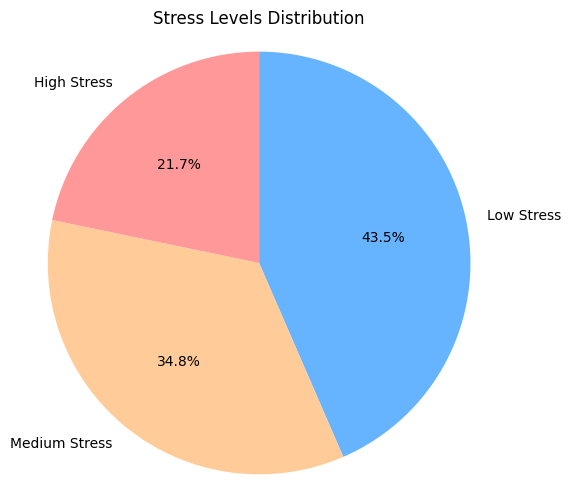

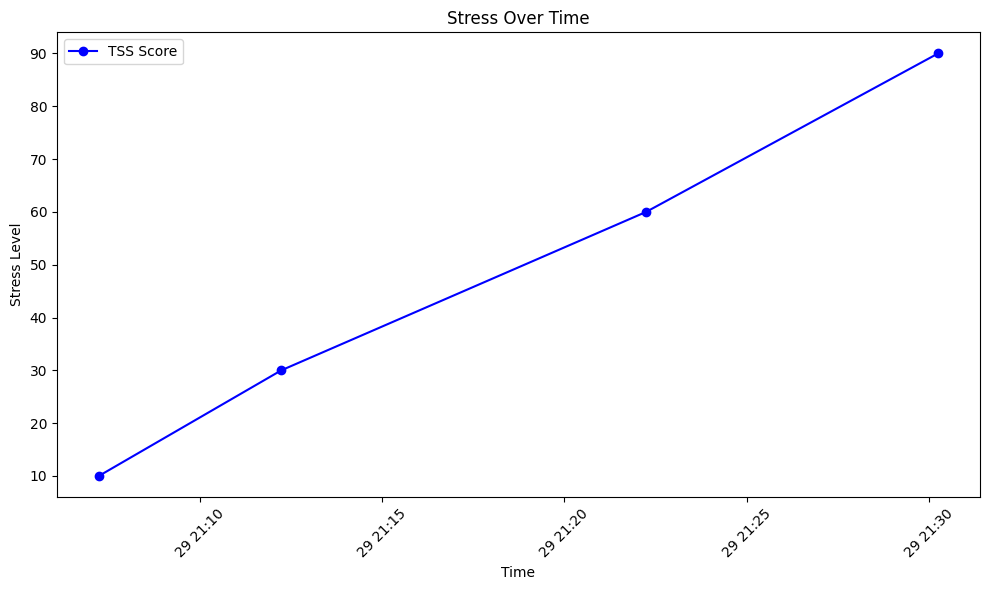

In [19]:
stress_at_rest = data['physical_health']['events']['stress_event']['stress']['stress_at_rest_duration_seconds_int']
stress_duration = data['physical_health']['events']['stress_event']['stress']['stress_duration_seconds_int']
low_stress = data['physical_health']['events']['stress_event']['stress']['low_stress_duration_seconds_int']
medium_stress = data['physical_health']['events']['stress_event']['stress']['medium_stress_duration_seconds_int']
high_stress = data['physical_health']['events']['stress_event']['stress']['high_stress_duration_seconds_int']
stress_granular = data['physical_health']['events']['stress_event']['stress']['tss_granular_data_array']
stress_avg = data['physical_health']['events']['stress_event']['stress']['stress_avg_level_int']
stress_max = data['physical_health']['events']['stress_event']['stress']['stress_maximum_level_int']
original_date = data['physical_health']['events']['stress_event']['metadata']['datetime_string']

def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)

# Check stress avg
if stress_max is None:
    stress_avg_result = "Stress Average: No values ​​were obtained or it is null."

else:
    stress_avg_result = f"Stress Average: {stress_avg}%"

# Check stress avg
if stress_max is None:
    stress_max_result = "Stress max: No values ​​were obtained or it is null."

else:
    stress_max_result = f"Stress max: {stress_max}%"
    
print(f"Event date: {translated_date}")
print(stress_avg_result)
print(stress_max_result)

# Calculate total stress duration
total_stress_duration = stress_duration

# Calculate percentages for each stress level
low_stress_percentage = (low_stress / total_stress_duration) * 100
medium_stress_percentage = (medium_stress / total_stress_duration) * 100
high_stress_percentage = (high_stress / total_stress_duration) * 100

# Data for the pie chart
labels = ['Low Stress', 'Medium Stress', 'High Stress']
sizes = [low_stress_percentage, medium_stress_percentage, high_stress_percentage]
colors = ['#66b3ff', '#ffcc99', '#ff9999']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Stress Levels Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

# Display summary data as percentages
summary_data = {
    "Low Stress Percentage": low_stress_percentage,
    "Medium Stress Percentage": medium_stress_percentage,
    "High Stress Percentage": high_stress_percentage
}

# Check if there is data in stress_granular
if stress_granular:
    # Convert data to a DataFrame
    stress_granular_df = pd.DataFrame(stress_granular)
    stress_granular_df['datetime'] = pd.to_datetime(stress_granular_df['datetime_string'])

    # Create the chart
    plt.figure(figsize=(10, 6))
    plt.plot(stress_granular_df['datetime'], stress_granular_df['tss_score_int'], marker='o', color='b', label='TSS Score')

    # Setting up labels and title
    plt.title('Stress Over Time')
    plt.xlabel('Time')
    plt.ylabel('Stress Level')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the graphic
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Stress Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
